In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft
import os

PATH = os.getcwd() + '/'
PATH

'/home/andre/Documents/Git/ColetaPressao/ColetaPressao/test/'

1000.0


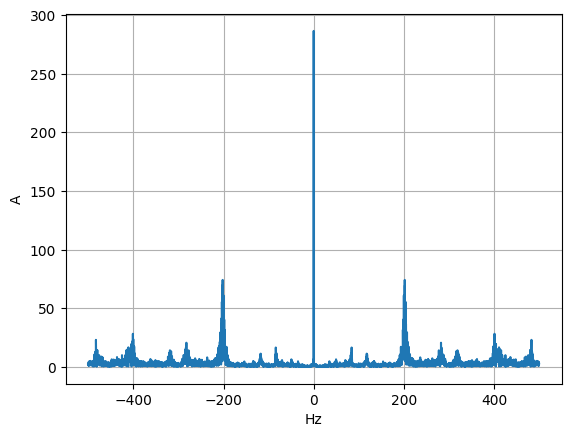

In [52]:
Ts = 1/1000
Fs = 1/Ts
print(Fs)

data = np.loadtxt(PATH + 'ATmega328p/data.txt')

data_fft = fft.fftshift(fft.fft(data))
freqs = np.fft.fftshift(np.fft.fftfreq(len(data_fft), 1/Fs))

plt.plot(freqs, np.abs(data_fft) / len(data_fft))

plt.grid()
plt.xlabel("Hz")
plt.ylabel('A')

plt.show()

Coeficientes do Filtro FIR:
[0.01601677 0.03776234 0.09297631 0.15600355 0.19724103 0.19724103
 0.15600355 0.09297631 0.03776234 0.01601677]


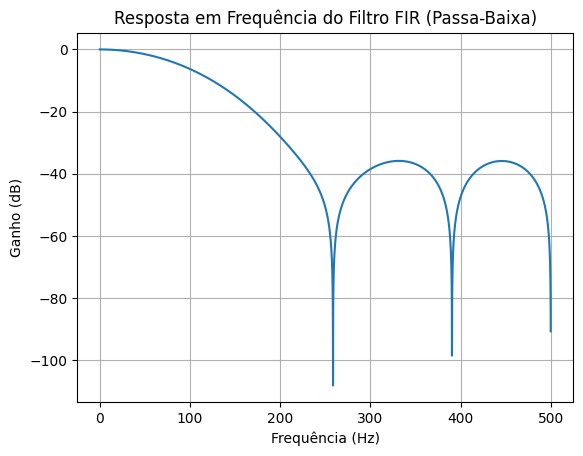

In [53]:
# Especificações do filtro
fs = Fs          # Taxa de amostragem em Hz
fc = 10            # Frequência de corte em Hz
num_taps = 10     # Número de coeficientes (taps)

# Gerar os coeficientes do filtro FIR
coefficients = signal.firwin(num_taps, fc, fs=fs,window = 'hamming', pass_zero='lowpass')

# Exibir os coeficientes
print("Coeficientes do Filtro FIR:")
print(coefficients)

# Visualizar a resposta em frequência
w, h = signal.freqz(coefficients, worN=8000, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))

plt.title("Resposta em Frequência do Filtro FIR (Passa-Baixa)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Ganho (dB)")
plt.grid()

plt.show()

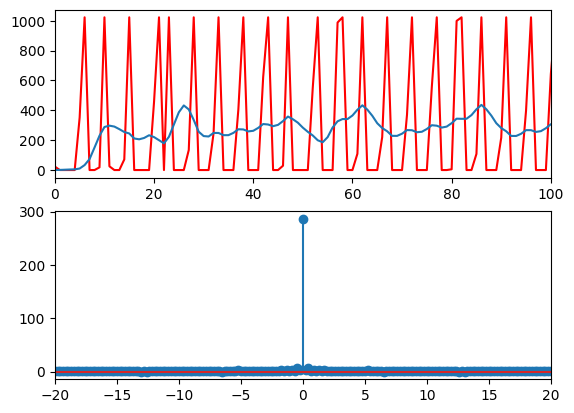

In [56]:
data_filter = signal.lfilter(coefficients, 1, data)

xfft = fft.fftshift(fft.fft(data_filter))

freqs = np.fft.fftshift(np.fft.fftfreq(len(xfft), 1/fs))

plt.subplot(211)
plt.plot(data, color='red')
plt.plot(data_filter)
plt.xlim(0, 100)

plt.subplot(212)
plt.stem(freqs, np.abs(xfft) / len(xfft))
plt.xlim(-20, 20)

plt.show()